## Data Set: titanic


Full Tree

The accuracy is 0.8547486033519553
The precision is 0.8529411764705882
The recall is 0.7837837837837838
The classification report is
               precision    recall  f1-score   support

           0       0.86      0.90      0.88       105
           1       0.85      0.78      0.82        74

    accuracy                           0.85       179
   macro avg       0.85      0.84      0.85       179
weighted avg       0.85      0.85      0.85       179

The confusion matrix is [[95 10]
 [16 58]]


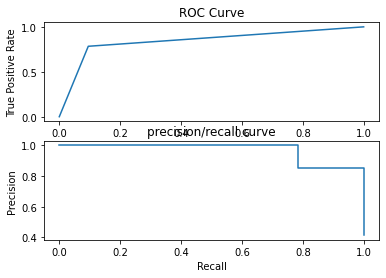

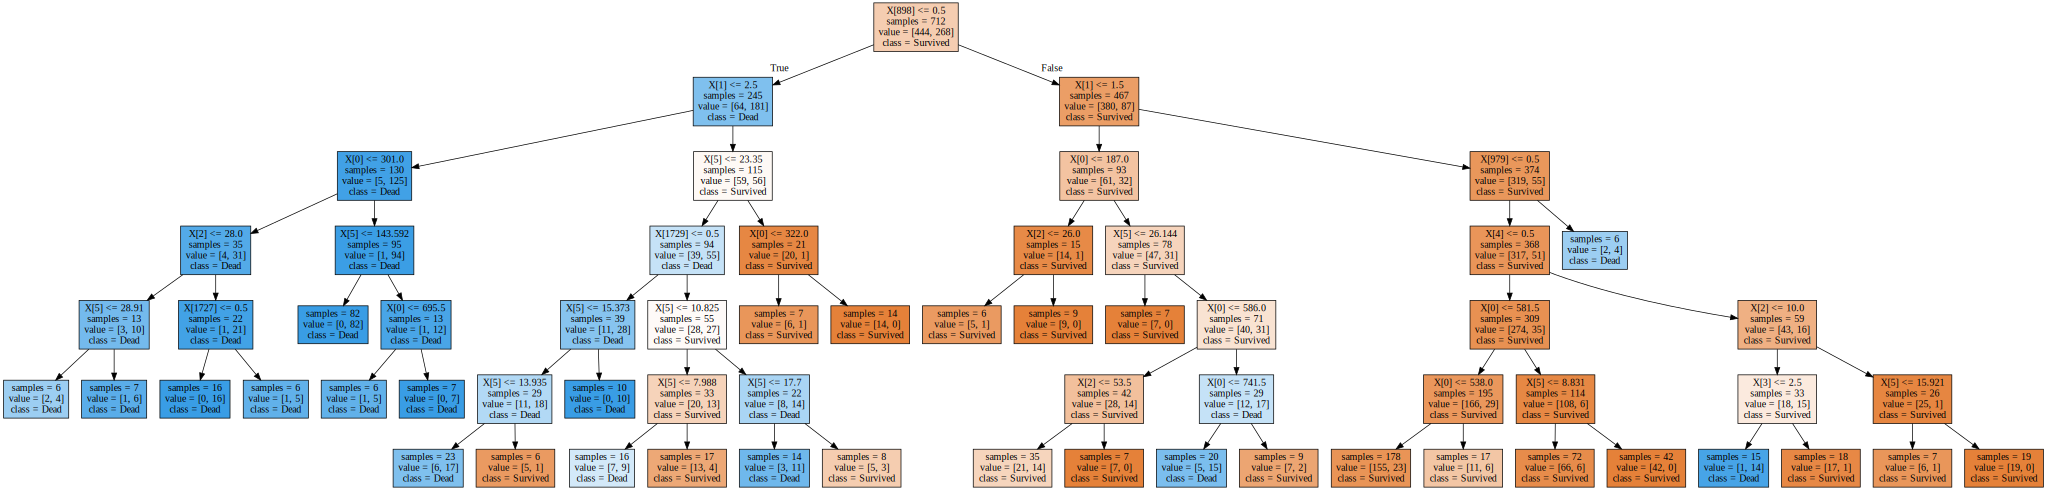

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
# Set a random seed
import random
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import precision_score,recall_score,accuracy_score,confusion_matrix,roc_curve,classification_report,precision_recall_curve
from graphviz import Source
import graphviz
from IPython.display import display,SVG

random.seed(42)

# Load the dataset
in_file = 'titanic.csv'
full_data = pd.read_csv(in_file)

outcomes = full_data['Survived']
features_raw = full_data.drop('Survived', axis = 1)
features = pd.get_dummies(features_raw)
features = features.fillna(0.0)

X_train, X_test, y_train, y_test = train_test_split(features, outcomes, test_size=0.2, random_state=42)
# Import the classifier from sklearn
model = DecisionTreeClassifier(max_depth=6, min_samples_leaf=6, min_samples_split=10)
model.fit(X_train,y_train)
# Making predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

'''
1. The accuracy of your model on the test data
2. The precision and recall values
3. A classification report (scikit-learn has a function that can create this for you)
4. The confusion matrix for this experiment
5. An ROC curve
6. A Precision/Recall curve
'''
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
classification = classification_report(y_test, y_test_pred)
confusion = confusion_matrix(y_test, y_test_pred)
print('The accuracy is', accuracy)
print('The precision is', precision)
print('The recall is',recall)
print('The classification report is\n',classification)
print('The confusion matrix is',confusion)

fpr, tpr, thersholds = roc_curve(y_test, y_test_pred)
pre, rec, thresholds2 = precision_recall_curve(y_test, y_test_pred)

plt.figure()
plt.subplot(2,1,1)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

plt.subplot(2,1,2)
plt.step(rec, pre)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('precision/recall curve')
plt.show()

graph = Source(tree.export_graphviz(model, out_file=None, class_names=['Survived','Dead'], impurity=False,filled=True))
graph
#graph.render(view=True, format="pdf", filename="decisiontree")

Tree with max depth 1

The accuracy is 0.7821229050279329
The precision is 0.7536231884057971
The recall is 0.7027027027027027
The classification report is
               precision    recall  f1-score   support

           0       0.80      0.84      0.82       105
           1       0.75      0.70      0.73        74

    accuracy                           0.78       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179

The confusion matrix is [[88 17]
 [22 52]]


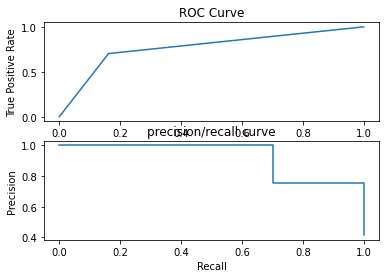

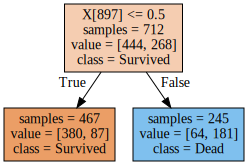

In [18]:
model1 = DecisionTreeClassifier(max_depth=1, min_samples_leaf=6, min_samples_split=10)
model1.fit(X_train,y_train)
# Making predictions
y_test_pred1 = model1.predict(X_test)

'''
1. The accuracy of your model on the test data
2. The precision and recall values
3. A classification report (scikit-learn has a function that can create this for you)
4. The confusion matrix for this experiment
5. An ROC curve
6. A Precision/Recall curve
'''
accuracy1 = accuracy_score(y_test, y_test_pred1)
precision1 = precision_score(y_test, y_test_pred1)
recall1 = recall_score(y_test, y_test_pred1)
classification1 = classification_report(y_test, y_test_pred1)
confusion1 = confusion_matrix(y_test, y_test_pred1)
print('The accuracy is', accuracy1)
print('The precision is', precision1)
print('The recall is',recall1)
print('The classification report is\n',classification1)
print('The confusion matrix is',confusion1)

fpr1, tpr1, thersholds1 = roc_curve(y_test, y_test_pred1)
pre1, rec1, thresholds21 = precision_recall_curve(y_test, y_test_pred1)

plt.figure()
plt.subplot(2,1,1)
plt.plot(fpr1, tpr1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

plt.subplot(2,1,2)
plt.step(rec1, pre1)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('precision/recall curve')
plt.show()

graph = Source(tree.export_graphviz(model1, out_file=None, class_names=['Survived','Dead'], impurity=False,filled=True))
graph
#graph.render(view=True, format="pdf", filename="decisiontree_depth1")

Compare

When using one level depth decision tree, the accurate value of the result is lower. Judging from the conflict matrix, the correct result is not as good as the full depth decision tree, and the area of the ROC curve is not as good as the full depth decision tree, so the full depth decision tree will have better prediction results